# **CS145: Project 3 | San Francisco Greenery vs. Public Service Needs**

### **Collaborators**
Please list the names and SUNet IDs of your collaborators below:
* *Mary Fetter, mfetter*
* *Clara MacAvoy, cmacavoy*

## **Project Overview**

---

***Central Question:* How do the street trees in San Francisco relate to the types of public service needs (as measured by calls and incidents reported to the 311 non-emergency line, the San Francisco Police Department (SFPD), and the San Francisco Fire Department (SFFD))?**

In our project, we explore how the greenery of an urban area (San Francisco) can be correlated to the public service needs of a sub-location within that area. To do so, we examine the relationship between the street trees in San Francisco and the types of public service calls/incidents made to different latitude/longitude locations. The types of service calls/incidents serve as a proxy for other public service information and service needs, including street and tree maintenance requests, crime rates, and fire or ambulance calls.

In our main analysis, we mostly focus on call/report data from 2016-2017 to limit the scope and keep the volume of data manageable.

Specifically, the main sub-questions we explore are:
1. How do the 311 service call categories relate to attributes about trees nearby to those calls (including average number of trees, average tree age, average height of trees, and whether the tree is privately cared for or not)?

2. How do the SFPD incident categories relate to attributes about trees nearby to those incidents (including average number of trees, average tree age, average height of trees, and whether the tree is privately cared for or not)?

3. How do the SFFD call types relate to attributes about trees nearby to those calls (including average number of trees, average tree age, average height of trees, and whether the tree is privately cared for or not)?

---


## **Analysis of Dataset**

---
### Dataset Overview
We use one dataset for this project: `bigquery-public-data.san_francisco`. Specifically, we explore four tables within this set.
(**Total dataset size: 2.45 GB**):

1. San Francisco's `street_trees` (40.09 MB): information about *street* trees planted in San Francisco, deprecated 2018. Not that this is ONLY street trees, not trees in parks or other public greenspaces.

2. San Francisco `311_service_requests` (808.28 MB): information about calls made to the 311 service line, deprecated 2018.

3. San Francisco `sfpd_incidents` (358.4 MB): information about incident reports made to the San Francisco Police Department, deprecated 2018.

4. San Francisco `sffd_service_calls` (1.24 GB): information about calls made to the San Francisco Fire Department, deprecated 2018.

----

#### (1) San Francisco's `street_trees` table
The `street_trees` table contains 40.09 MB of data about all of the street trees planted in San Francisco from 1955-2018 (189,379 trees [rows in table]). The primary key is `tree_id`, a unique integer identifier for each tree. Some of the other attributes included in this table are the legal status of the tree, the species of the tree, information about the tree site, the caretaker type (e.g. "Private"), the plant date, tree height/depth, and the tree location (including longitude and latitude data) [not an extensive list]. For our project, we focus on the **caretaker type** (STRING), the **plant date** (TIMESTAMP), **tree height** (STRING), and **tree location data** (FLOAT). Additionally for our project, the foreign keys are the location data (`longitude` and `latitude`), used in computing which trees are nearby to a given service call/incident.

#### (2) San Francisco's `311_service_requests` table
The `311_service_requests` table contains 808.28 MB of data about the 311 (non-emergency service calls/requests) made in San Francisco from 2008-2018 (2,783,215 service requests [rows in table]). The primary key is `unique_key`, a unique integer identifier for each request/call. Some of the other attributes included in this table include the date created, date closed, category of call (e.g. is it a tree maintenance call, a graffiti report, etc.), a descriptor of the call, and location data (including longitude and latitude data) [not an extensive list]. For our project, we focus on the **category of service request** (STRING) attribute, since that relates to the service need. Additionally for our project, the foreign keys are the **location data** (`longitude` and `latitude`, both FLOATs), used in computing which trees are nearby to a given service call.

#### (3) San Francisco's `sfpd_incidents` table
The `sfpd_incidents` table contains 358.4 MB of data about the San Francisco Police Department incident reports in San Francisco from 2003-2018 (2,170,785 incident reports [rows in table]). The primary key is `unique_key`, a unique integer identifier for each incident. Some of the other attributes included in this table include category of incident (e.g. is it a burglary, prostitution, etc.), a descriptor of the incident, what day of the week the incident occurred, the resolution of the incident, and location data (including longitude and latitude data) [not an extensive list]. For our project, we focus on the **category of incident** (STRING) attribute, since that relates to the service need. Additionally for our project, the foreign keys are the **location data** (`longitude` and `latitude`, both FLOATs), used in computing which trees are nearby to a given incident.

#### (4) San Francisco's `sffd_service_calls` table
The `sffd_service_calls` table contains 1.24 GB of data about the San Francisco Fire Department service calls in San Francisco from 2000-2018 (4,557,045 calls [rows in table]). The primary key is `call_number`, a unique integer identifier for each call. Some of the other attributes included in this table include the call type (e.g. is it a structure fire, a medical issue, etc.), call date, the response time, which fire battalion was dispatched, and location data (including longitude and latitude data) [not an extensive list]. For our project, we focus on the **call type** (STRING) attribute, since that relates to the service need. Additionally for our project, the foreign keys are the **location data** (`longitude` and `latitude`, both FLOATs), used in computing which trees are nearby to a given call.

## **Data Exploration**

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs145-p3-2022"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Add imports for any visualization libraries you may need
import matplotlib.pyplot as plt

%matplotlib inline

### Data Overview
In this section of the data exploration, we look at basic information about call/incident type and frequency for each table. These plots use the data from the entire dataset/tables (i.e. 2018 and prior). Analysis is below, in the summary of this section.

#### Street Tree Counts by Species

In [ ]:
%%bigquery count_by_species --project $project_id

SELECT species, COUNT(species) AS counts
FROM `bigquery-public-data.san_francisco.street_trees` AS trees
GROUP BY species
ORDER BY COUNT(species) DESC
LIMIT 100

Query is running:   0%|          |

Downloading:   0%|          |

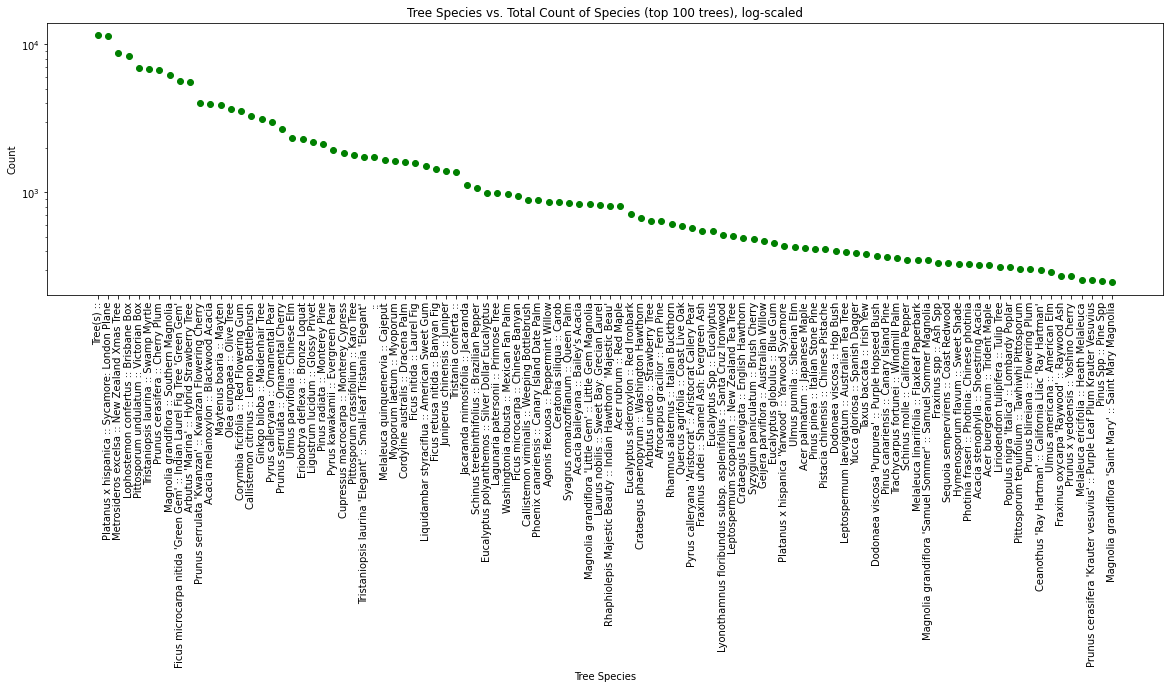

In [ ]:
plt.figure(figsize=(20, 5))
plt.scatter(count_by_species["species"], count_by_species["counts"], color="green")
plt.title("Tree Species vs. Total Count of Species (top 100 trees), log-scaled")
plt.xlabel("Tree Species")
plt.ylabel("Count")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

#### 311 Call Counts by Type

In [ ]:
%%bigquery count_by_311_category --project $project_id

SELECT category, COUNT(category) AS counts
FROM `bigquery-public-data.san_francisco.311_service_requests` AS calls
GROUP BY category
ORDER BY COUNT(category) DESC
LIMIT 50

Query is running:   0%|          |

Downloading:   0%|          |

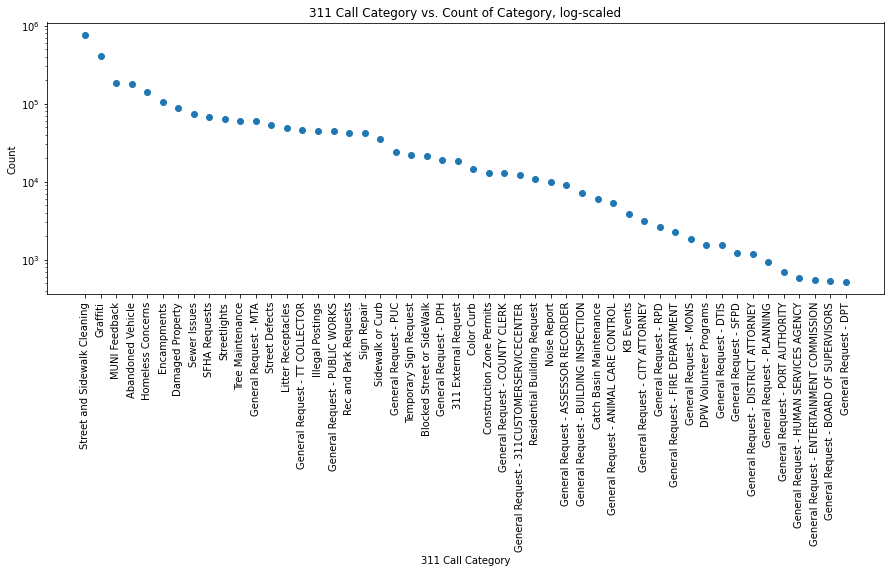

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(count_by_311_category["category"], count_by_311_category["counts"])
plt.title("311 Call Category vs. Count of Category, log-scaled")
plt.xlabel("311 Call Category")
plt.ylabel("Count")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

#### SFPD Incidents by Type

In [ ]:
%%bigquery count_by_SFPD_category --project $project_id

SELECT category, COUNT(category) AS counts
FROM `bigquery-public-data.san_francisco.sfpd_incidents` AS incidents
GROUP BY category
ORDER BY COUNT(category) DESC
LIMIT 50

Query is running:   0%|          |

Downloading:   0%|          |

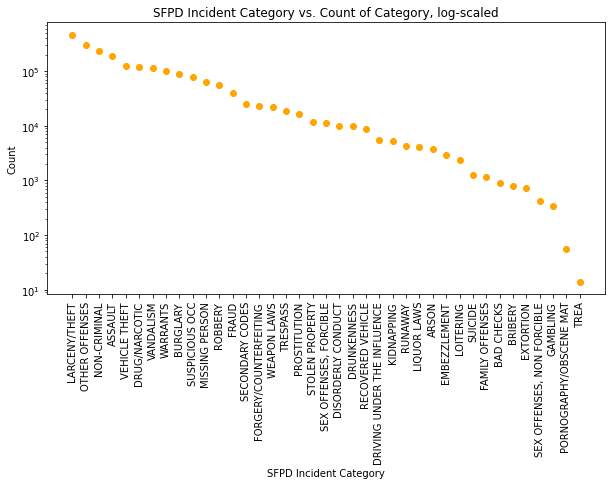

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(count_by_SFPD_category["category"], count_by_SFPD_category["counts"], color="orange")
plt.title("SFPD Incident Category vs. Count of Category, log-scaled")
plt.xlabel("SFPD Incident Category")
plt.ylabel("Count")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

#### SFFD Calls by Type

In [ ]:
%%bigquery count_by_SFFD_category --project $project_id

SELECT call_type, COUNT(call_type) AS counts
FROM `bigquery-public-data.san_francisco.sffd_service_calls` AS calls
GROUP BY call_type
ORDER BY COUNT(call_type) DESC
LIMIT 50

Query is running:   0%|          |

Downloading:   0%|          |

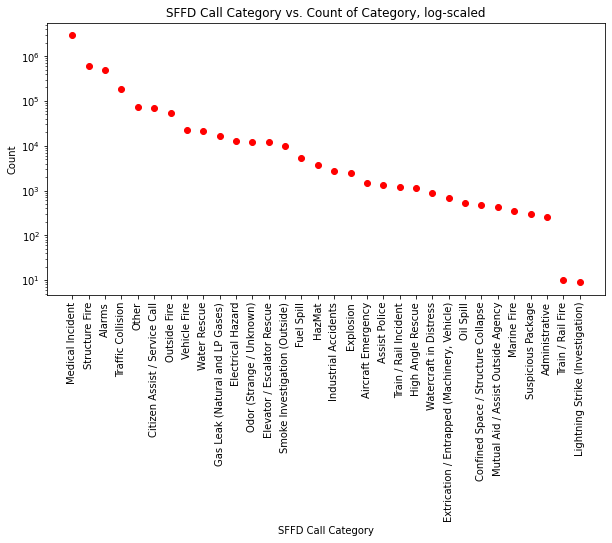

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(count_by_SFFD_category["call_type"], count_by_SFFD_category["counts"], color="red")
plt.title("SFFD Call Category vs. Count of Category, log-scaled")
plt.xlabel("SFFD Call Category")
plt.ylabel("Count")
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

#### Summary of Data Overview Explorations
Based on the above data visualizations, we see that:
1. The counts by tree species are roughly exponential, implying that some species of trees are much more popular than others. Due to the large number of trees that are not labeled specifically by species, and the general not-clean nature of the labeling, we did not further explore the tree species attribute.

2. For each of the call/incident categories/types, we see that there is an unequal distribution among the different categories/types, as evidenced by the linear curve on a logarithmic-scaled graph. For example, for the SFFD plot, we seed that `Medical Incident[s]`, `Structural Fire[s]`, and `Alarms` occur much more frequently than `Lighting Strike (Investigation)[s]`. This matches our intution that some calls categories occur more frequently than others. This is relevant to our later predictions because the model weights will bias towards categories with larger amounts of data.

### Location Visualizations
In this section of the data exploration, we visualize where our trees, calls, and incidents are taking place within San Francisco to better understand the location data for each table. These plots use the data from the entire dataset/table (i.e. 2018 and prior).

#### Street Tree Locations

In [ ]:
%%bigquery tree_locs --project $project_id
SELECT species, longitude AS tree_long, latitude AS tree_lat, COUNT(ST_GeogPoint(longitude, latitude)) AS count_pt
FROM `bigquery-public-data.san_francisco.street_trees` AS trees
GROUP BY species, longitude, latitude

Query is running:   0%|          |

Downloading:   0%|          |

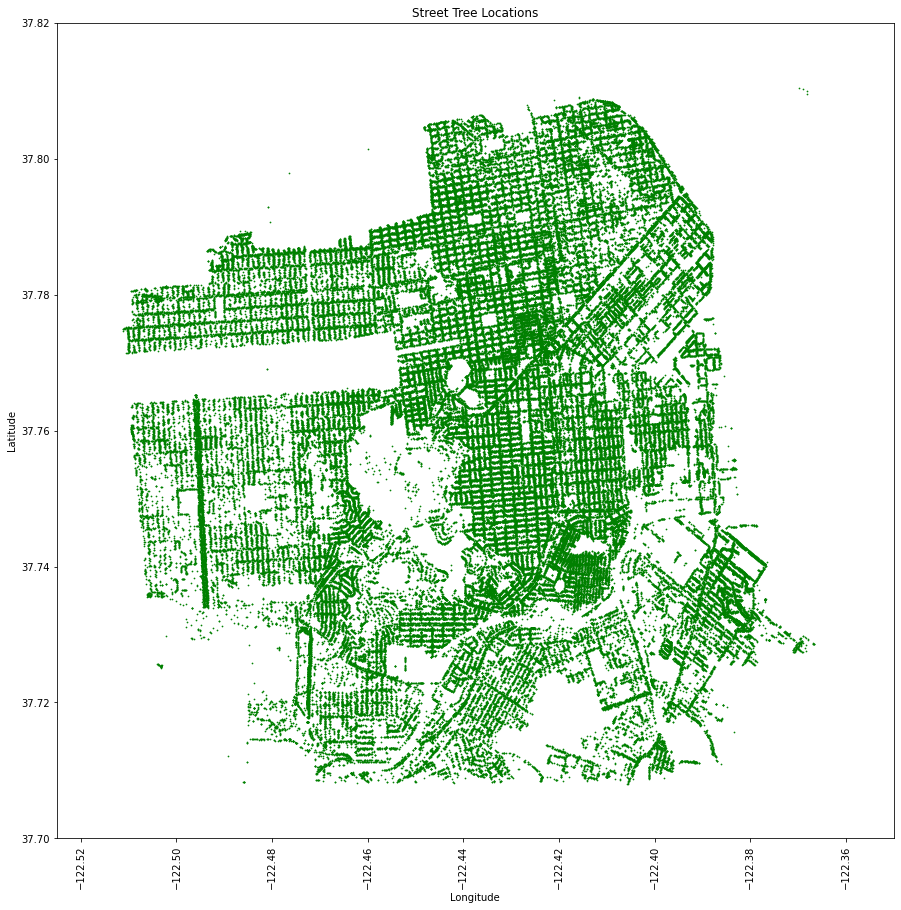

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(tree_locs["tree_long"], tree_locs["tree_lat"], s=0.5, color='green')
plt.title("Street Tree Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([-122.525, -122.35])
plt.ylim([37.7, 37.82])
plt.xticks(rotation=90)
plt.show()

#### 311 Call Locations

In [ ]:
%%bigquery loc_311 --project $project_id
SELECT unique_key, longitude AS service_long, latitude AS service_lat, COUNT(ST_GeogPoint(longitude, latitude)) AS count_pt
FROM `bigquery-public-data.san_francisco.311_service_requests` AS calls
GROUP BY unique_key, longitude, latitude

Query is running:   0%|          |

Downloading:   0%|          |

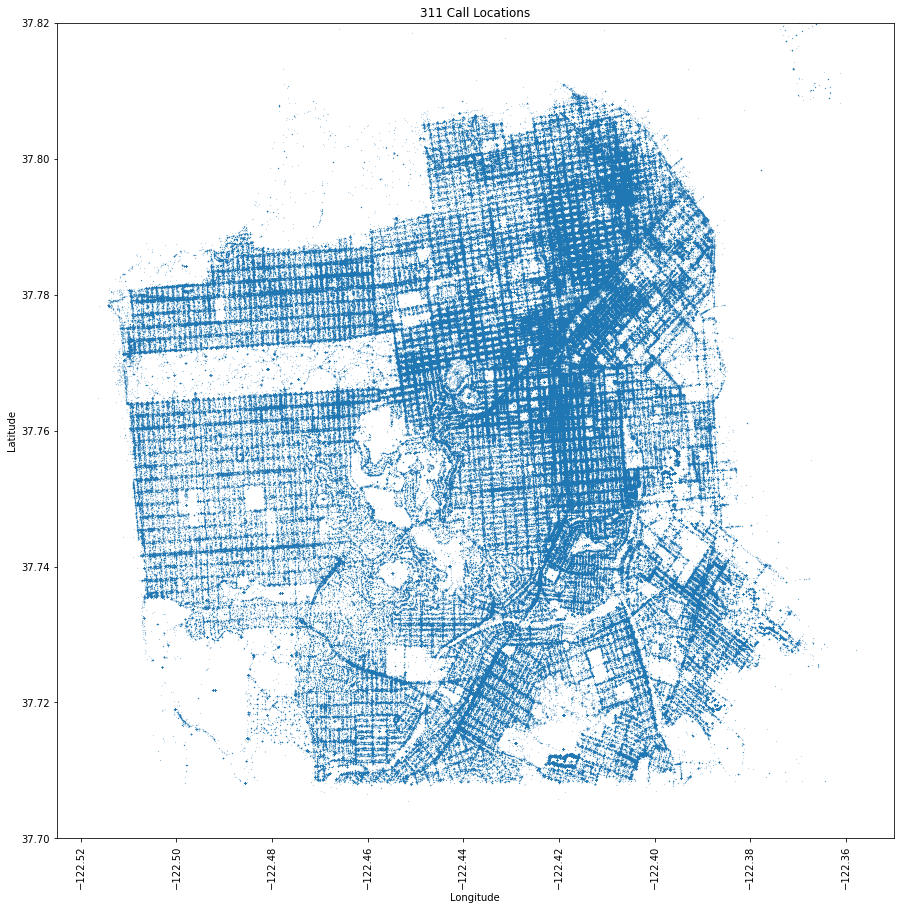

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(loc_311["service_long"], loc_311["service_lat"], s=0.01)
plt.title("311 Call Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([-122.525, -122.35])
plt.ylim([37.7, 37.82])
plt.xticks(rotation=90)
plt.show()

#### 311 Tree Maintenance Calls vs. Street Tree Locations
This plot overlays the street trees with the "Tree Maintenance" calls made to the 311 line. Note that there are calls made in parks (where street trees are not recorded).

In [ ]:
%%bigquery tree_311_locs --project $project_id
SELECT unique_key, longitude AS tree_service_long, latitude AS tree_service_lat, COUNT(ST_GeogPoint(longitude, latitude)) AS count_pt
FROM `bigquery-public-data.san_francisco.311_service_requests` AS calls
WHERE category LIKE 'Tree Maintenance'
GROUP BY unique_key, longitude, latitude

Query is running:   0%|          |

Downloading:   0%|          |

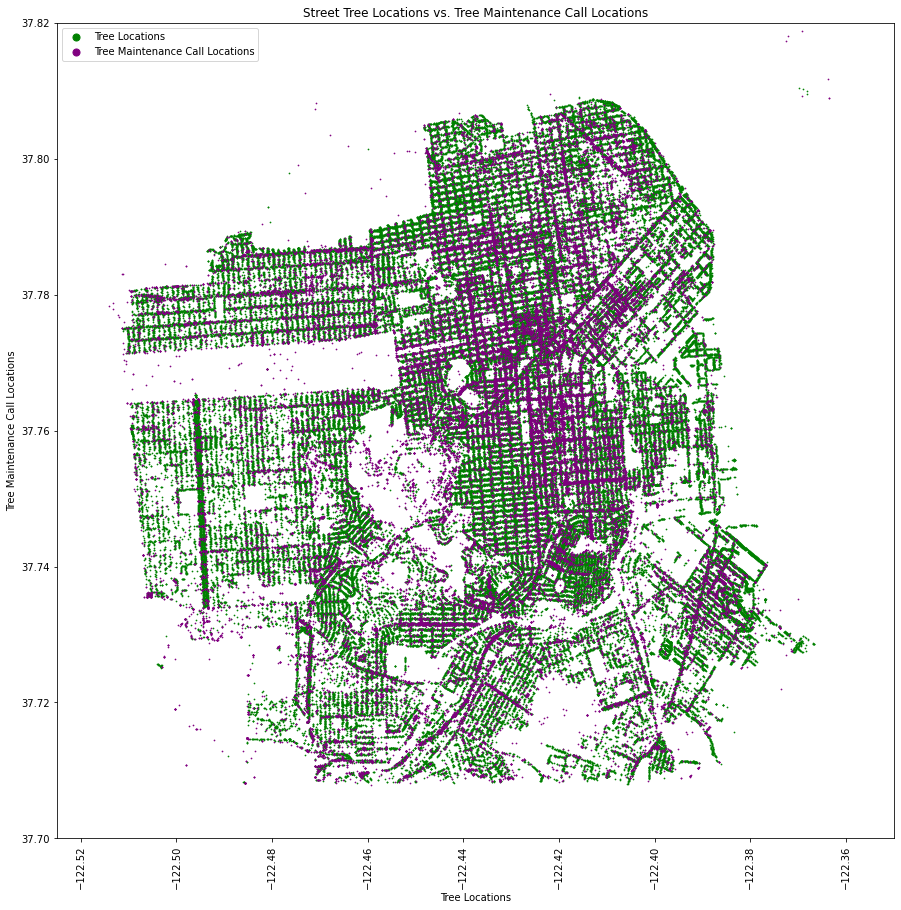

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(tree_locs["tree_long"], tree_locs["tree_lat"], s=0.5, color='green')
plt.scatter(tree_311_locs["tree_service_long"], tree_311_locs["tree_service_lat"], s=0.5, color='purple')
plt.title("Street Tree Locations vs. Tree Maintenance Call Locations")
plt.xlabel("Tree Locations")
plt.ylabel("Tree Maintenance Call Locations")
plt.xlim([-122.525, -122.35])
plt.ylim([37.7, 37.82])
plt.xticks(rotation=90)
plt.legend(['Tree Locations', 'Tree Maintenance Call Locations'], markerscale=10)
plt.show()

#### SFPD Incident Locations

In [ ]:
%%bigquery SFPD_locs --project $project_id
SELECT unique_key, longitude AS incident_long, latitude AS incident_lat, COUNT(ST_GeogPoint(longitude, latitude)) AS count_pt
FROM `bigquery-public-data.san_francisco.sfpd_incidents` AS incidents
GROUP BY unique_key, longitude, latitude

Query is running:   0%|          |

Downloading:   0%|          |

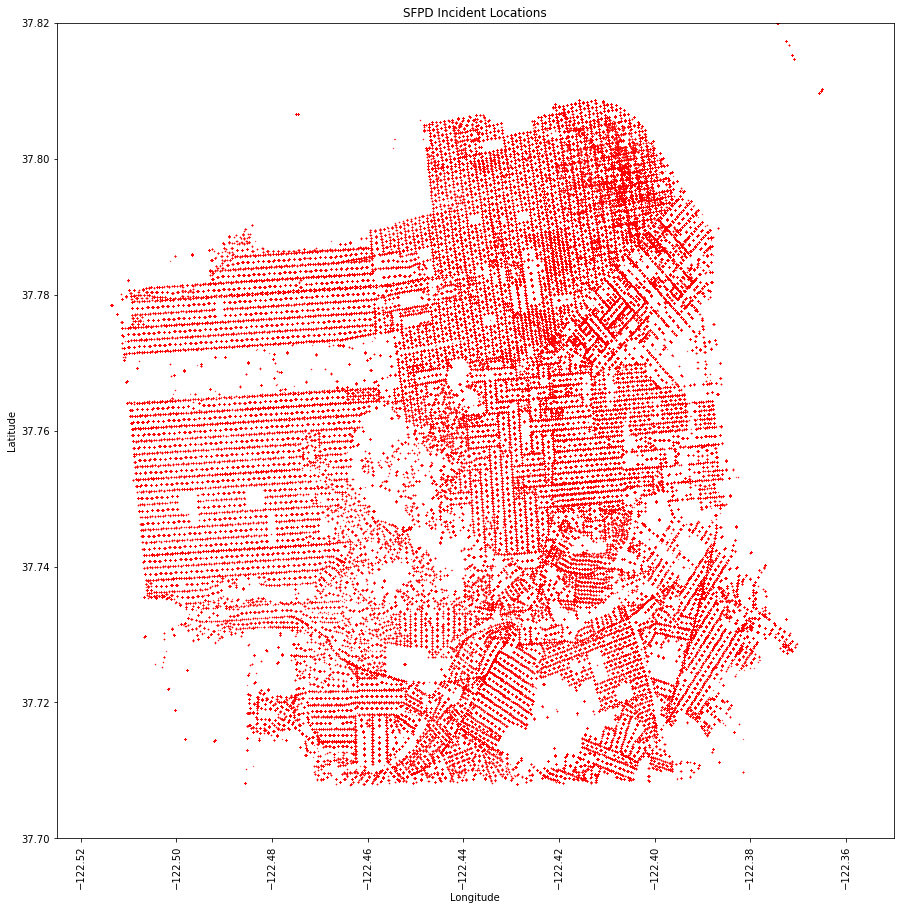

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(SFPD_locs["incident_long"], SFPD_locs["incident_lat"], s=0.1, color='red')
plt.title("SFPD Incident Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([-122.525, -122.35])
plt.ylim([37.7, 37.82])
plt.xticks(rotation=90)
plt.show()

#### SFPD Incidents vs. Number of Nearby Trees
Note, this is only mapping data from January of 2016 to March of 2016 (chosen to keep the data size managable and to ensure the map has meaningful visualization).

In [ ]:
%%bigquery count_trees_geo_sfpd --project $project_id

SELECT
  id,
  ST_GEOGPOINT(longitude, latitude) as location,
  num_close_trees
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNTIF(ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10) AS num_close_trees
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2016, 03, 01)
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE tree_counts.id = sfpd.unique_key

Query is running:   0%|          |

Downloading:   0%|          |

We then generated the following visualization using BigQuery GeoViz (larger dots correspond to more trees).

https://bigquerygeoviz.appspot.com?shareid=UZcx3lxBLOYmJmLVVWC0

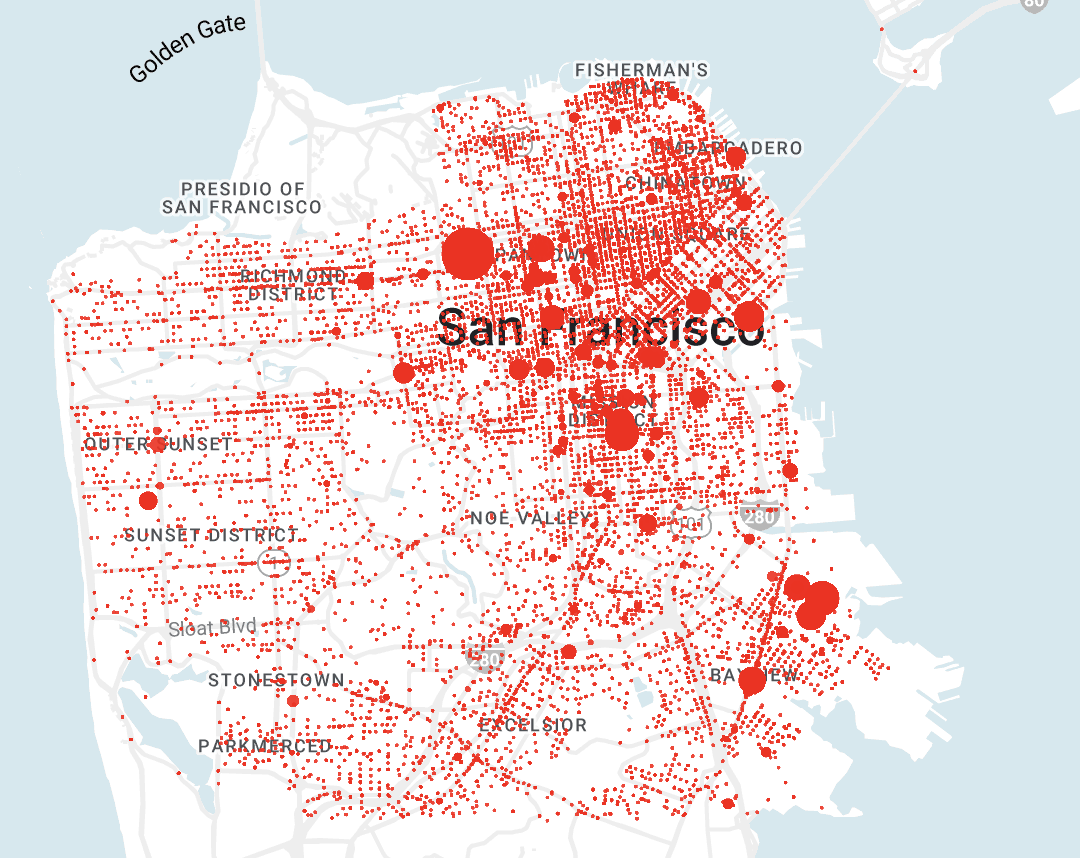

#### SFFD Call Locations

In [ ]:
%%bigquery SFFD_locs --project $project_id
SELECT call_number, longitude AS call_long, latitude AS call_lat, COUNT(ST_GeogPoint(longitude, latitude)) AS count_pt
FROM `bigquery-public-data.san_francisco.sffd_service_calls` AS calls
GROUP BY call_number, longitude, latitude

Query is running:   0%|          |

Downloading:   0%|          |

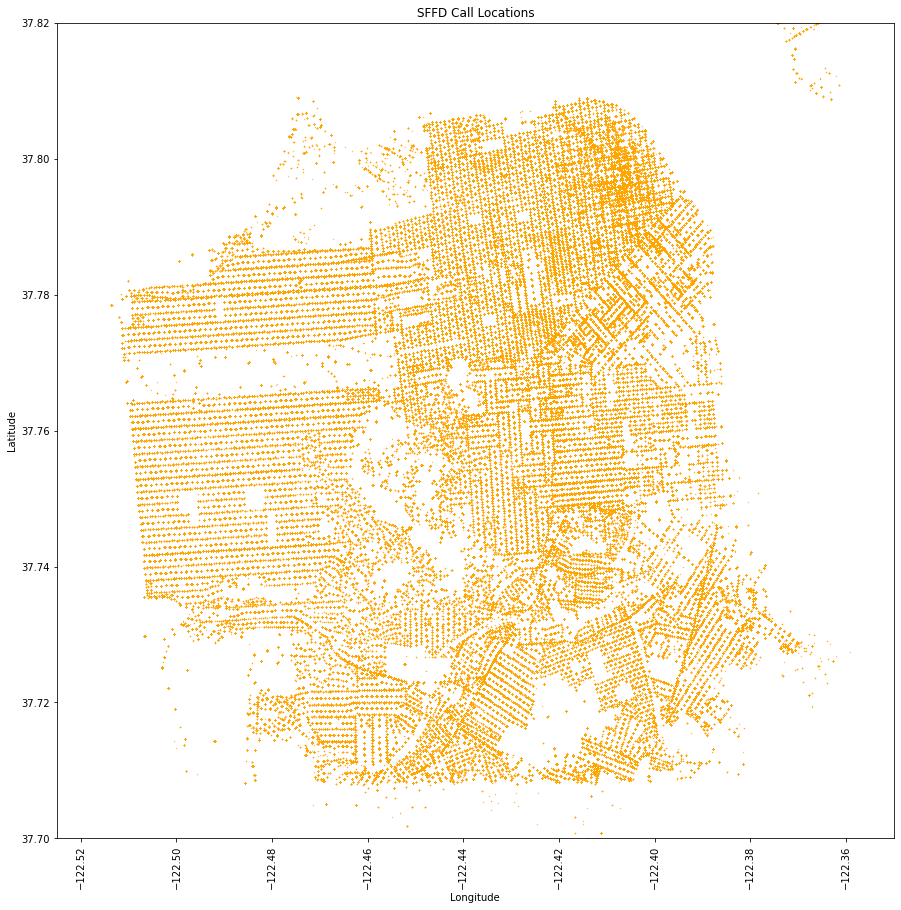

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(SFFD_locs["call_long"], SFFD_locs["call_lat"], s=0.1, color='orange')
plt.title("SFFD Call Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([-122.525, -122.35])
plt.ylim([37.7, 37.82])
plt.xticks(rotation=90)
plt.show()

#### Summary of Location Visualization Explorations
1. For the street tree locations, the above map makes clear that the dataset only includes *street* trees, as the parks are completely void of any trees. This is relevant because some calls/incidents in parks might be biased towards certain categories, but all of those calls will show zero trees nearby.

2. The three mappings (to 311, SFPD, SFFD) of call/incident locations look fairly similar, clearly showing outlines of the city, though also with fewer calls/incidents in parks. A potential explanation for this is that the park calls/incidents might get aggregated to only a few longitude/latitude points within the park.

3. The mapping of tree maintenance calls vs. street tree locations is interesting in that there are calls without trees, and trees without calls (i.e. not a perfect mapping). It makes sense that not all trees will have ever had a maintenance call made, and that some of the maintenance calls might not be made exactly where a tree is located. While this is insightful in its own right, we decided there wasn't much more to pursue here.

### Service Call Types and Average Tree Counts

In this section of the data exploration, we look at relationships between types of service calls or incident reports to 311, SFPD, and SFFD and the average number of trees in the area (using a 10m radius). These plots mostly focus on data from 2016 to keep size and scope manageable, as we do a complete cross join between city trees and service calls/incidents, and we only plot the top 10 categories.

#### 311 Calls vs. Average Number of Nearby Trees

In [ ]:
%%bigquery count_trees_311 --project $project_id
SELECT *
FROM (
SELECT
  category,
  COUNT(*) AS num_call_type,
  AVG(num_close_trees) AS avg_trees
FROM (
  SELECT
    serv.unique_key AS id,
    COUNTIF(ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10) AS num_close_trees
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2016, 03, 01)
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  tree_counts.id = serv.unique_key
GROUP BY
  category
HAVING
  num_call_type >= 50
ORDER BY
  num_call_type DESC
LIMIT 10 )
ORDER BY avg_trees DESC

Query is running:   0%|          |

Downloading:   0%|          |

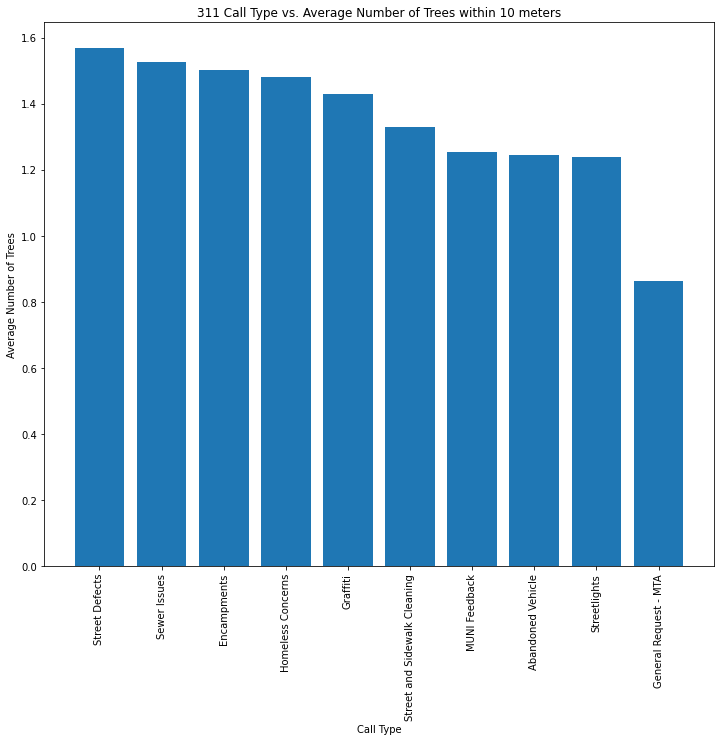

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(count_trees_311["category"], count_trees_311["avg_trees"])
plt.title("311 Call Type vs. Average Number of Trees within 10 meters")
plt.xlabel("Call Type")
plt.ylabel("Average Number of Trees")
plt.xticks(rotation = 90)
plt.show()

#### SFPD Incidents vs. Average Number of Nearby Trees

In [ ]:
%%bigquery count_trees_sfpd --project $project_id
SELECT *
FROM (
SELECT
  category,
  COUNT(*) as num_offense,
  AVG(num_close_trees) as avg_trees
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNTIF(ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10) AS num_close_trees
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2016, 03, 01)
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE tree_counts.id = sfpd.unique_key
GROUP BY category
ORDER BY num_offense DESC
LIMIT 10 )
ORDER BY avg_trees DESC

Query is running:   0%|          |

Downloading:   0%|          |

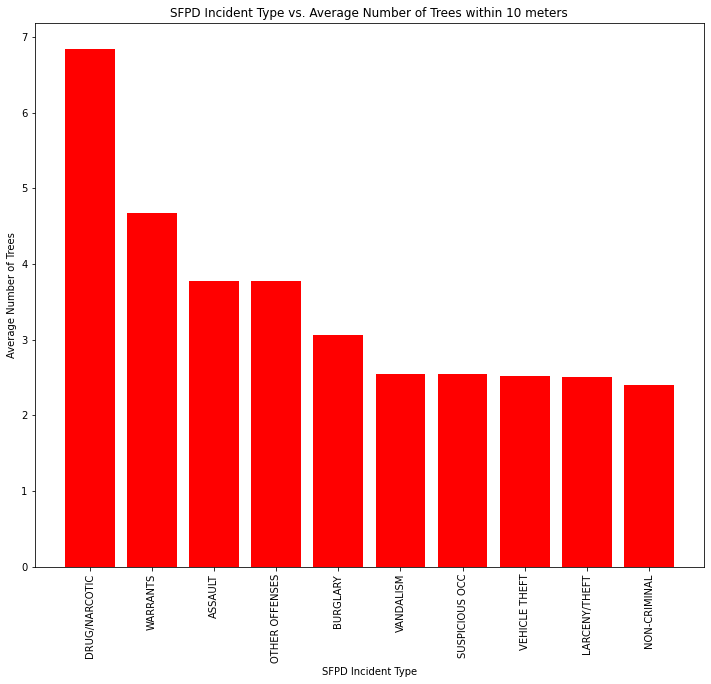

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(count_trees_sfpd["category"], count_trees_sfpd["avg_trees"], color='red')
plt.title("SFPD Incident Type vs. Average Number of Trees within 10 meters")
plt.xlabel("SFPD Incident Type")
plt.ylabel("Average Number of Trees")
plt.xticks(rotation = 90)
plt.show()

#### SFFD Calls vs. Average Number of Nearby Trees

In [ ]:
%%bigquery count_trees_sffd --project $project_id
SELECT *
FROM (SELECT
  call_type,
  COUNT(*) AS num_offense,
  AVG(num_close_trees) AS avg_trees
FROM (
  SELECT
    serv.call_number AS id,
    COUNTIF(ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10) AS num_close_trees
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2016, 06, 01)
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  tree_counts.id = serv.call_number
GROUP BY
  call_type
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_trees DESC

Query is running:   0%|          |

Downloading:   0%|          |

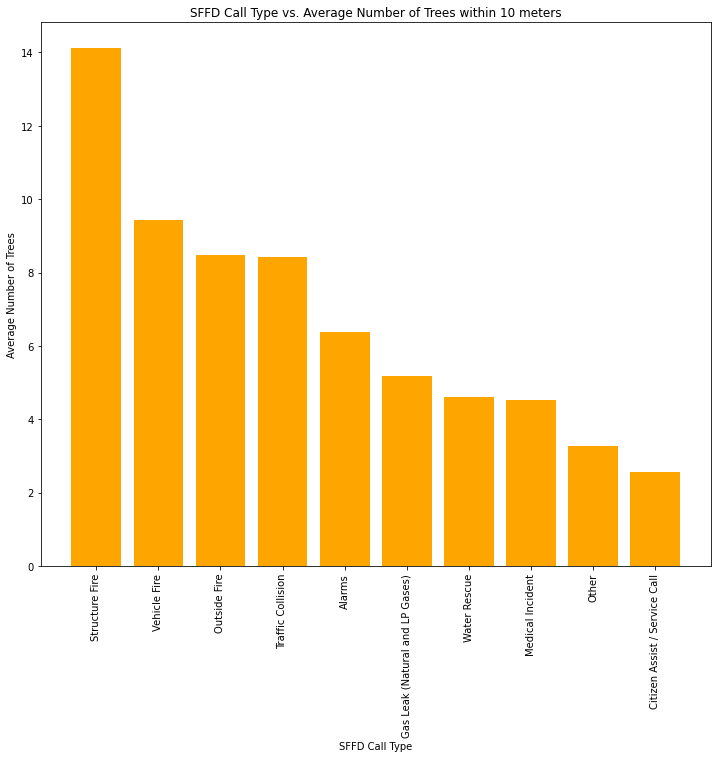

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(count_trees_sffd["call_type"], count_trees_sffd["avg_trees"], color='orange')
plt.title("SFFD Call Type vs. Average Number of Trees within 10 meters")
plt.xlabel("SFFD Call Type")
plt.ylabel("Average Number of Trees")
plt.xticks(rotation = 90)
plt.show()

#### Summary of Service Call/Incident Types and Average Tree Counts
We decided to use a 10m radius as the metric for "nearby" to a call because it captures the trees immediately surrounding the area.

1. Looking at these three graphs together, we see that the top categories for each have VERY different average number of trees. Specifically, for 311 calls, the top category is `Street Defects`, with about 1.5 nearby trees on average; for SFPD incidents, the top category is `DRUG/NARCOTIC` with about 7 nearby trees on average; for SFFD incidents, the top category is `Structure Fire` with about 14 nearby trees on average. We are not sure exactly why there is so much variation between these. However, this contributed to our decision to train and predict separately on each of the datasets, so that we didn't bias learning towards the average of all three.

2. There is less variance between the average number of trees for different types/categories for the 311 calls than for the SFPD or SFFD calls, but the variance in all three is significant enough to use in trying to train and predict call/incident type.

3. As a specific example analysis, we can look at the SFFD plot, where we see that three different types of fires are more likely to have larger numbers of trees than other types of calls. It makes sense that fires might occur more often near trees or homes (which are more likely to have trees outside than big office buildings). This type of thinking reinforced our notion that average number of trees might be a relevant feature in determining call/incident type.

### Service Calls and Average Tree Age
In this section of the data exploration, we look at relationships between types of service calls or incident reports to 311, SFPD, and SFFD and the average tree age in years of nearby trees (using a 10m radius). Note, these are only for trees with a known plant date. These plots mostly focus on data from 2016 to keep size and scope manageable, as we do a complete cross join between city trees and service calls/incidents, and we only plot the top 10 categories.



#### 311 Calls vs. Average Age of Nearby Trees

In [ ]:
%%bigquery age_trees_311 --project $project_id
SELECT *
FROM (SELECT
  category,
  COUNT(*) AS num_offense,
  AVG(tree_age) AS avg_tree_age
FROM (
  SELECT
    serv.unique_key AS id,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND plant_date IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  tree_counts.id = serv.unique_key
GROUP BY
  category
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_tree_age DESC

Query is running:   0%|          |

Downloading:   0%|          |

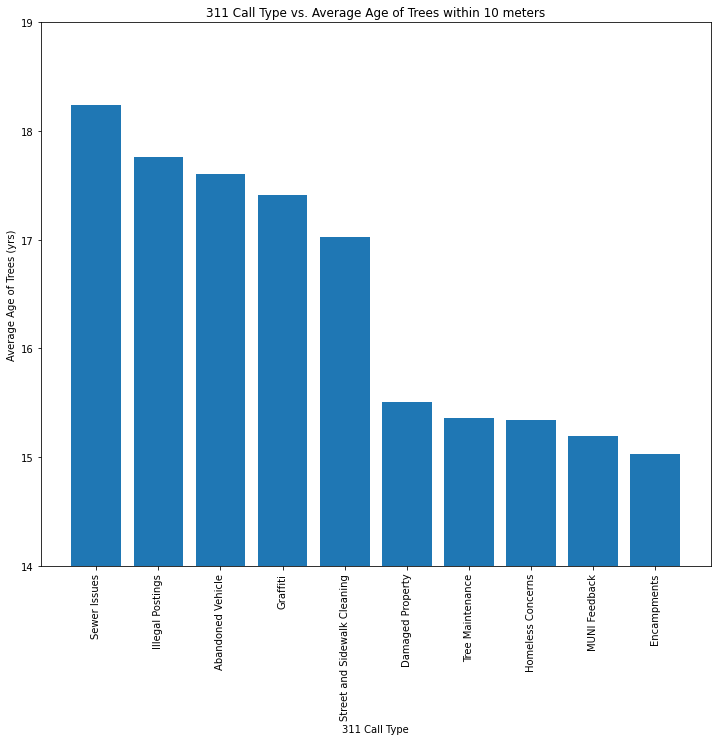

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(age_trees_311["category"], age_trees_311["avg_tree_age"])
plt.title("311 Call Type vs. Average Age of Trees within 10 meters")
plt.xlabel("311 Call Type")
plt.ylabel("Average Age of Trees (yrs)")
plt.ylim(14,19)
plt.xticks(rotation = 90)
plt.show()

#### SFPD Incidents vs. Average Age of Nearby Trees

In [ ]:
%%bigquery age_trees_sfpd --project $project_id
SELECT *
FROM (SELECT
  category,
  COUNT(*) AS num_offense,
  AVG(tree_age)/365 AS avg_tree_age
FROM (
  SELECT
    sfpd.unique_key AS id,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)) AS tree_age
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2016, 06, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 100
    AND plant_date IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  tree_counts.id = sfpd.unique_key
GROUP BY
  category
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_tree_age DESC

Query is running:   0%|          |

Downloading:   0%|          |

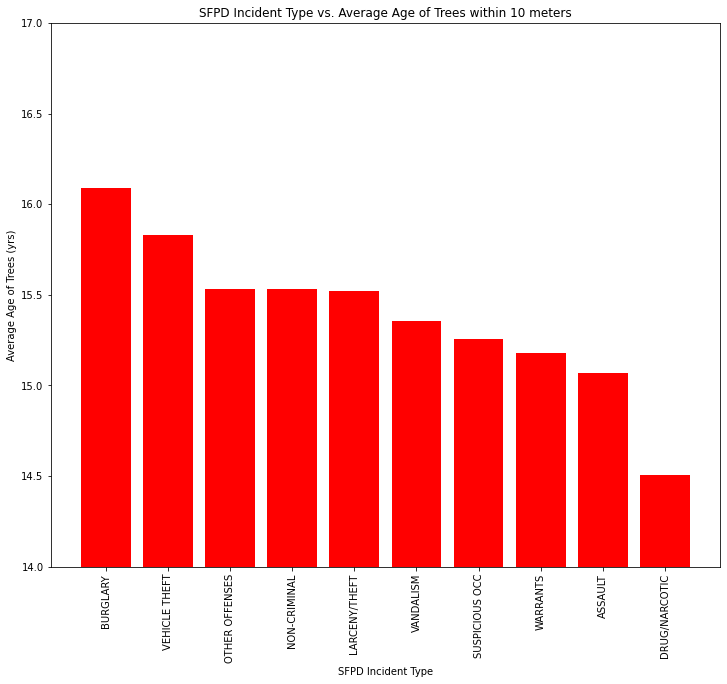

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(age_trees_sfpd["category"], age_trees_sfpd["avg_tree_age"], color='red')
plt.title("SFPD Incident Type vs. Average Age of Trees within 10 meters")
plt.xlabel("SFPD Incident Type")
plt.ylabel("Average Age of Trees (yrs)")
plt.ylim(14,17)
plt.xticks(rotation = 90)
plt.show()

#### SFFD Calls vs. Average Age of Nearby Trees

In [ ]:
%%bigquery age_trees_sffd --project $project_id
SELECT *
FROM (SELECT
  call_type,
  COUNT(*) AS num_offense,
  AVG(tree_age) AS avg_tree_age
FROM (
  SELECT
    serv.call_number AS id,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls`  AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 100
    AND plant_date IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  tree_counts.id = serv.call_number
GROUP BY
  call_type
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_tree_age DESC

Query is running:   0%|          |

Downloading:   0%|          |

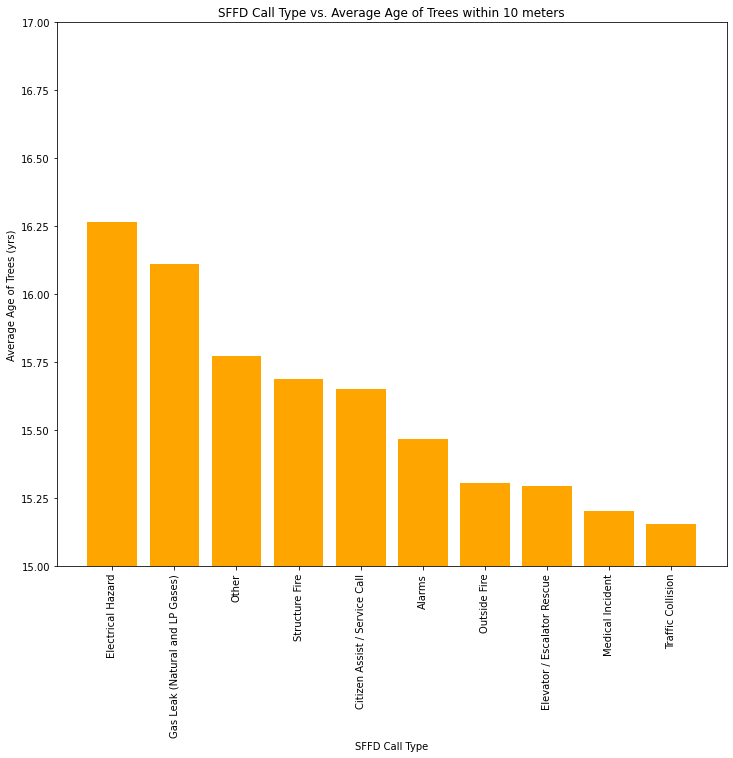

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(age_trees_sffd["call_type"], age_trees_sffd["avg_tree_age"], color='orange')
plt.title("SFFD Call Type vs. Average Age of Trees within 10 meters")
plt.xlabel("SFFD Call Type")
plt.ylabel("Average Age of Trees (yrs)")
plt.ylim(15,17)
plt.xticks(rotation = 90)
plt.show()

#### Summary of Service Call/Incidents Types and Average Tree Age
We decided to use a 10m radius as the metric for "nearby" to a call because it captures the trees immediately surrounding the area.

1. Looking at these three graphs together, we see that the top categories for each have fairly similar average tree ages, though the 311 calls have slightly older trees on average.

2. For both the 311 and SFFD datasets, the category of calls/incidents associated with the older trees also correlate with issues that generally occur in areas recieving less maintenance. For example, two of 311 categories with the oldest average trees are `Sewer issues` and `Abandoned vehicles`. It makes sense that newly planted trees might be in areas receiving more regular city maintenance, and thus have fewer of this systemic issues.

3. Additionally, the top categories for each of the three plots here are not the same as the top categories when we looked at average number of nearby trees. One possible explanation for this is that older trees are likely larger than smaller trees, so there might be fewer per unit area. Also, some of the older trees may have died and not been replaced, hence the difference in top call/incident types/categories between this section and the previous section.

4. Finally, we also see that there is reasonable variance across different categories, suggesting that this is a good feature to use to predict call/incident type/category. 

### Service Calls and Fraction of Private Caretakers of Trees
In this section of the data exploration, we look at relationships between types of service calls or incident reports to 311, SFPD, and SFFD and the average fraction of nearby trees that have a "Private" caretaker (using a 10m radius). These plots mostly focus on data from 2016 to keep size and scope manageable, as we do a complete cross join between city trees and service calls/incidents, and we only plot the top 10 categories.



#### 311 Calls vs. Average Fraction of Nearby Trees with  Private Caretakers

In [ ]:
%%bigquery private_trees_311 --project $project_id
SELECT *
FROM (SELECT
  category,
  COUNT(*) AS num_offense,
  AVG(private_care) AS avg_private
FROM (
  SELECT
    serv.unique_key AS id,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2016, 06, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND trees.care_taker IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  tree_counts.id = serv.unique_key
GROUP BY
  category
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_private DESC

Query is running:   0%|          |

Downloading:   0%|          |

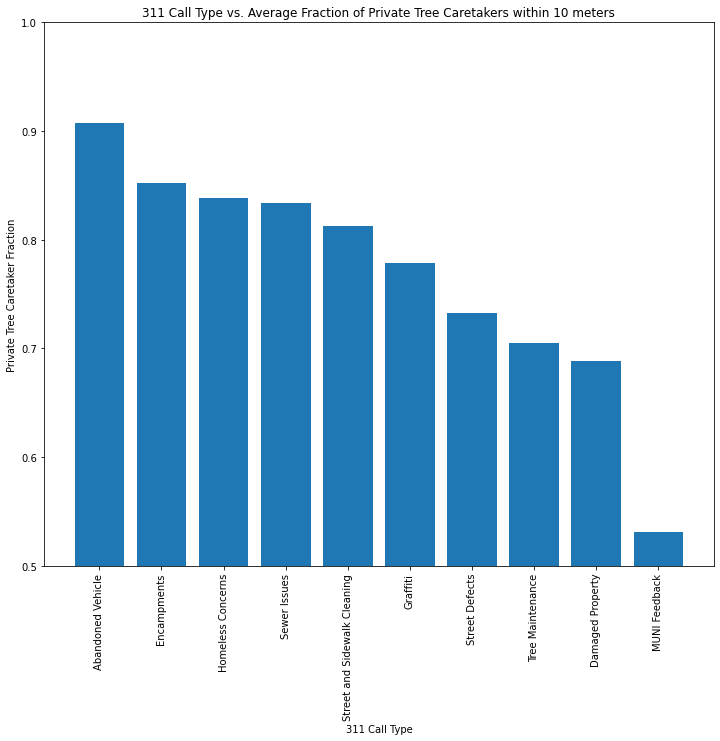

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(private_trees_311["category"], private_trees_311["avg_private"])
plt.title("311 Call Type vs. Average Fraction of Private Tree Caretakers within 10 meters")
plt.xlabel("311 Call Type")
plt.ylabel("Private Tree Caretaker Fraction")
plt.ylim(.5,1)
plt.xticks(rotation = 90)
plt.show()

#### SFPD Incidents vs. Average Fraction of Nearby Trees with  Private Caretakers

In [ ]:
%%bigquery private_trees_sfpd --project $project_id
SELECT *
FROM (SELECT
  category,
  COUNT(*) AS num_offense,
  AVG(private_care) AS avg_private
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2016, 06, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND trees.care_taker IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  tree_counts.id = sfpd.unique_key
GROUP BY
  category
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_private DESC

Query is running:   0%|          |

Downloading:   0%|          |

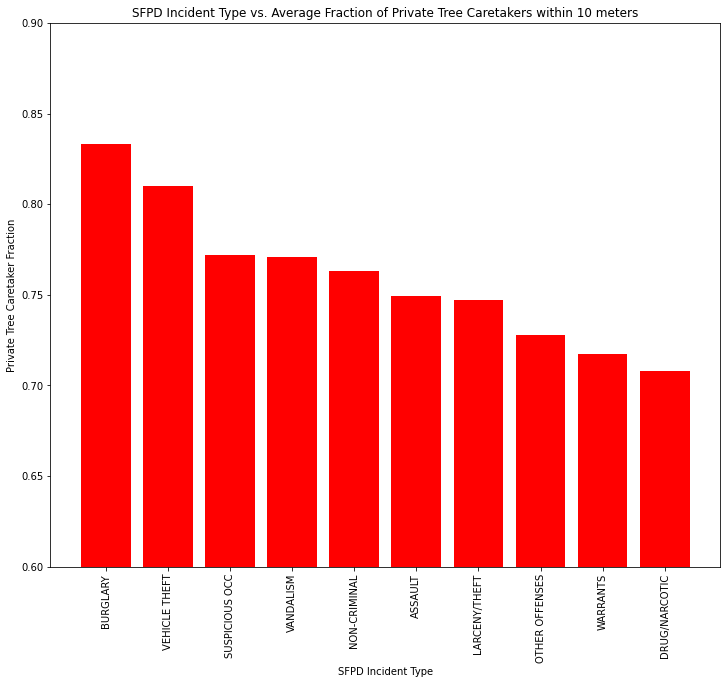

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(private_trees_sfpd["category"], private_trees_sfpd["avg_private"], color='red')
plt.title("SFPD Incident Type vs. Average Fraction of Private Tree Caretakers within 10 meters")
plt.xlabel("SFPD Incident Type")
plt.ylabel("Private Tree Caretaker Fraction")
plt.ylim(.6,.9)
plt.xticks(rotation = 90)
plt.show()

#### SFFD Calls vs. Average Fraction of Nearby Trees with  Private Caretakers

In [ ]:
%%bigquery private_trees_sffd --project $project_id
SELECT *
FROM (SELECT
  call_type,
  COUNT(*) AS num_offense,
  AVG(private_care) AS avg_private
FROM (
  SELECT
    serv.call_number AS id,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 06, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 12, 31)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND trees.care_taker IS NOT NULL
  GROUP BY
    (id)) AS tree_counts,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  tree_counts.id = serv.call_number
GROUP BY
  call_type
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_private DESC

Query is running:   0%|          |

Downloading:   0%|          |

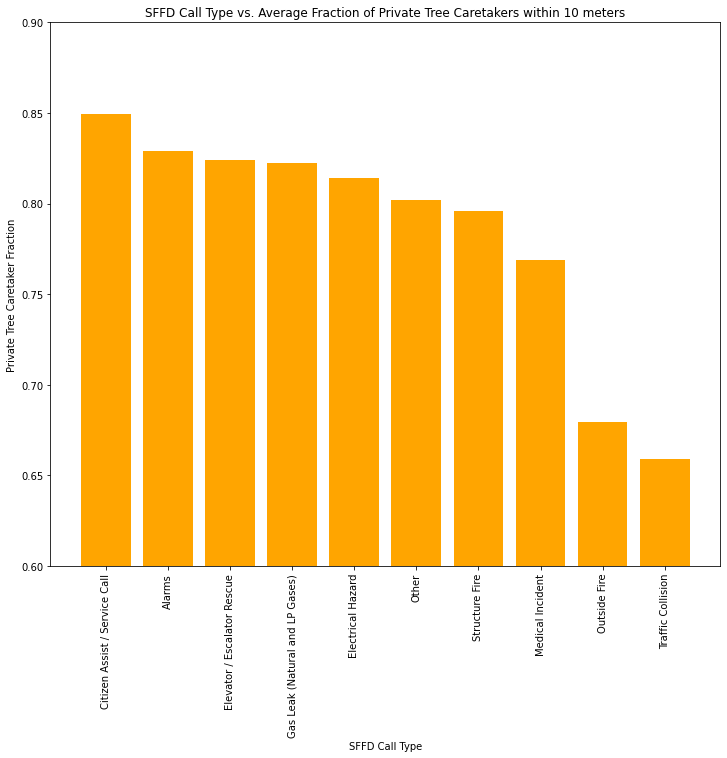

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(private_trees_sffd["call_type"], private_trees_sffd["avg_private"], color='orange')
plt.title("SFFD Call Type vs. Average Fraction of Private Tree Caretakers within 10 meters")
plt.xlabel("SFFD Call Type")
plt.ylabel("Private Tree Caretaker Fraction")
plt.ylim(.6,.9)
plt.xticks(rotation = 90)
plt.show()

#### Summary of Service Call/Incidents Types and Average Fraction of Private Caretakers
We decided to use a 10m radius as the metric for "nearby" to a call because it captures the trees immediately surrounding the area.

1. In general, the three above plots have roughly the same fractions of private caretakers for their top categories (between ~0.85 and ~0.9). However, the SFPD and SFFD plots show considerably less variance within their top ten (especially the SFPD set) as compared to the 311 calls, which spans ~0.9 for the fraction in the top category (`abandoned vehicle`) to ~0.5 (`municipal complaints`).

2. The limited amount of variance in the fraction of private caretakers for the SFPD set suggest that this is possibly a less telling feature in distinguishing the top categories, though we will likely train our models using it anyway so we can compare across datasets [note: our SFPD training model performed much worse than the other two, and we think the limited variance here might have been a contributing factor to this].

3. On the other hand, the more significant variance in fraction of private caretakers the 311 set suggests that this is a very telling feature for determining the category of 311 call. One potential explanation for this is that the 311 calls represent a wider range of issues (e.g. people call the 311 lines for many reasons, some more esoteric than others vs. people call the emergency lines only when there is an emergency).

4. Finally, one very interesting point is that the top category of SFFD call here is a `Citizens Assist`, which rarely ever appears in the top 10. One hypothesis we had here is that older citizens are more likely to need assistance, and probably also more likely to be living near old trees.


### Service Calls and Average Height of Trees
In this section of the data exploration, we look at relationships between types of service calls or incident reports to 311, SFPD, and SFFD and the average height of nearby trees (using a 10m radius). These plots mostly focus on data from 2016 to keep size and scope manageable, as we do a complete cross join between city trees and service calls/incidents, and we only plot the top 10 categories.




#### 311 Calls vs. Average Height of Nearby Trees

In [ ]:
%%bigquery height_trees_311 --project $project_id
SELECT *
FROM (SELECT
  category,
  COUNT(*) AS num_offense,
  AVG(tree_height) AS avg_tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2016, 06, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh is NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  tree_counts.id = serv.unique_key
GROUP BY
  category
HAVING
  num_offense >= 100
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_tree_height DESC

Query is running:   0%|          |

Downloading:   0%|          |

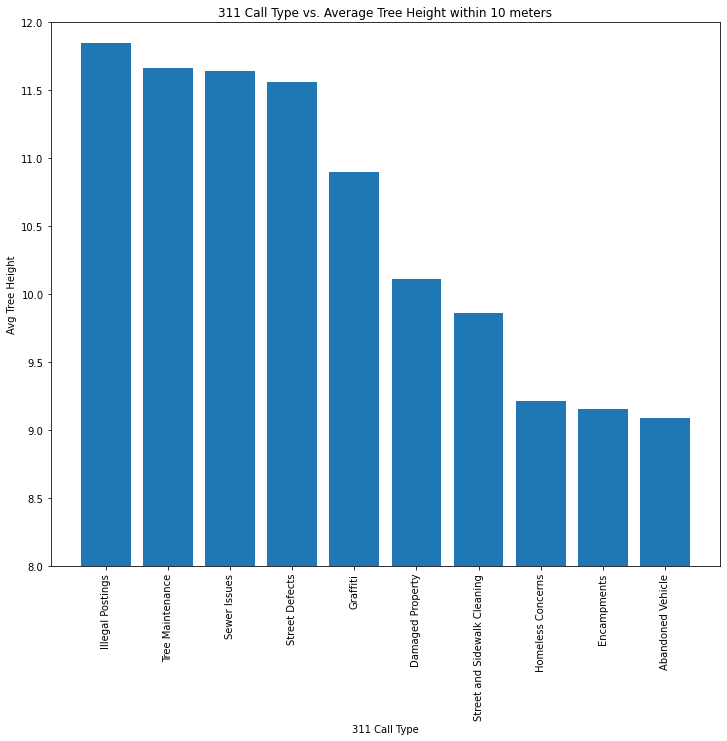

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(height_trees_311["category"], height_trees_311["avg_tree_height"])
plt.title("311 Call Type vs. Average Tree Height within 10 meters")
plt.xlabel("311 Call Type")
plt.ylabel("Avg Tree Height")
plt.ylim(8,12)
plt.xticks(rotation = 90)
plt.show()

#### SFPD Incidents vs. Average Height of Nearby Trees

In [ ]:
%%bigquery height_trees_sfpd --project $project_id
SELECT *
FROM (SELECT
  category,
  COUNT(*) AS num_offense,
  AVG(tree_height) AS avg_tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2016, 06, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND dbh is NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_counts,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  tree_counts.id = sfpd.unique_key
GROUP BY
  category
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_tree_height DESC

Query is running:   0%|          |

Downloading:   0%|          |

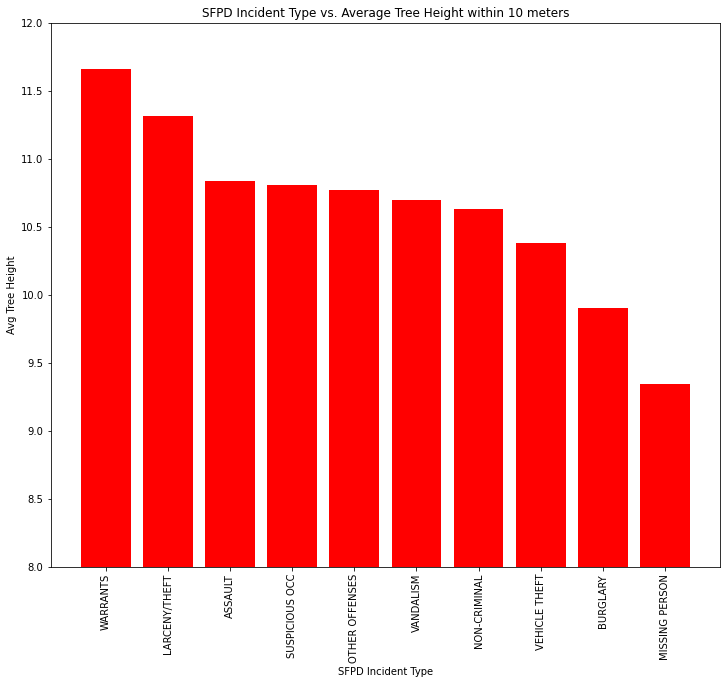

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(height_trees_sfpd["category"], height_trees_sfpd["avg_tree_height"], color='red')
plt.title("SFPD Incident Type vs. Average Tree Height within 10 meters")
plt.xlabel("SFPD Incident Type")
plt.ylabel("Avg Tree Height")
plt.ylim(8,12)
plt.xticks(rotation = 90)
plt.show()

#### SFFD Calls vs. Average Height of Nearby Trees

In [ ]:
%%bigquery height_trees_sffd --project $project_id
SELECT *
FROM (SELECT
  call_type,
  COUNT(*) AS num_offense,
  AVG(tree_height) AS avg_tree_height
FROM (
  SELECT
    serv.call_number AS id,
    AVG(CAST(dbh as INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2016, 12, 31)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh is NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_counts,
  `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  tree_counts.id = serv.call_number
GROUP BY
  call_type
HAVING
  num_offense >= 50
ORDER BY
  num_offense DESC
LIMIT 10 )
ORDER BY avg_tree_height DESC

Query is running:   0%|          |

Downloading:   0%|          |

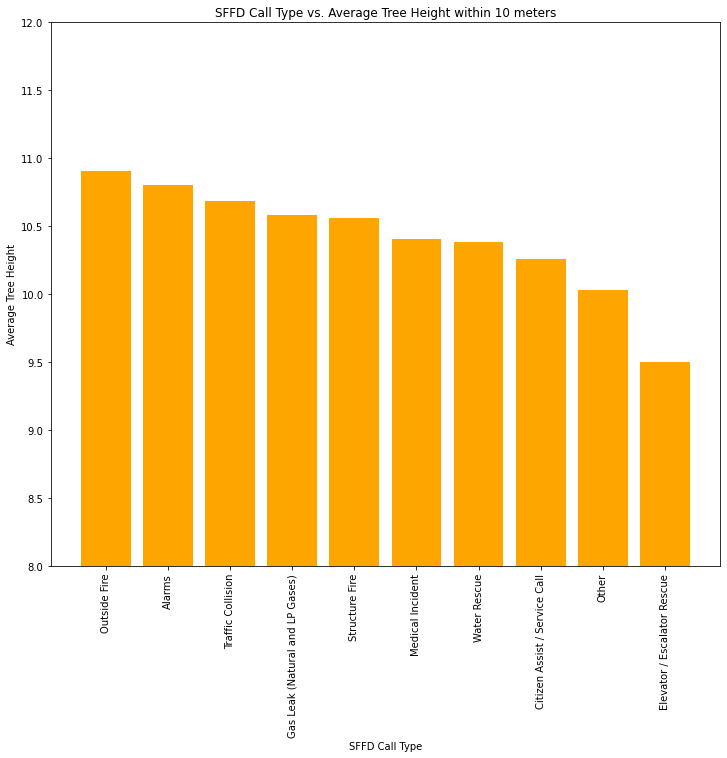

In [ ]:
plt.figure(figsize=(12, 10))
plt.bar(height_trees_sffd["call_type"], height_trees_sffd["avg_tree_height"], color='orange')
plt.title("SFFD Call Type vs. Average Tree Height within 10 meters")
plt.xlabel("SFFD Call Type")
plt.ylabel("Average Tree Height")
plt.ylim(8,12)
plt.xticks(rotation = 90)
plt.show()

#### Summary of Service Call/Incidents Types and Average Height of Nearby Trees
We decided to use a 10m radius as the metric for "nearby" to a call because it captures the trees immediately surrounding the area. We are also not exactly sure what units these measurements are in (the schema did not specify), but we suspect it is feet, and since we are comparing across categories, the exact units are not essential.

1. In general, the three above plots have roughly the same average heights for their top categories (between ~10.5 and ~12). The plots for 311 and SFPD look a bit more similar than the plot for SFFD.

2. Additionally, the 311 and SFPD plots have more variance within their top ten (especially the 311 plot, which spans ~9 to ~12) as compared to the SFFD plot, which only spans ~9.5 to ~10.75).

3. The limited amount of variance in the average height for the SFFD plot suggest that this is possibly a less telling feature in distinguishing the top categories, though we will likely train our models using it anyway so we can compare across datasets.

4. Generally, given the limited amount of variance in the average height for all three top-ten plots, this feature might be one of the less significant in determining call/incident type. 

5. To some extent, we had expected these plots to correlate more strongly with the average age plots, since we thought that taller trees might be older. 
  1. We see that this mostly holds for the 311 calls (top 3 for 311 avg. age are `Sewer Issues`, `Illegal Postings`, `Abandonded Vehicles` and for 311 avg. height, they are `Illegal Postings`, `Tree Maintenance`, and `Sewer Issues`. It also makes a lot of sense that the tallest trees are the most in need of maintanence!
  2. However, this correlation is NOT present in the top 3 avg. age and avg. height for SFPD or SFFD (in fact, there is no overlap in either). We are really not sure why this is the case, or why it differs so much from the 311 calls.

## **Data Prediction**
Based on our explorations and ultimate goal of answering the question about greenery and public service needs in San Francisco, in our predictions below we explore how well we can predict the public service call/incident in a location based on the characteristics of nearby trees. Specifically, we trained our models to look at the average number, average age, average fraction of private caretaker, and average height of nearby trees (using a 10m radius). See above for discussion on which of these we think might be better features than others in helping us predict call/incident type. We trained and predicted on each of the call/incident types with nearby trees using a variety of models, as described in more depth for each section below.

Note that due to the large number of similar predictions that we ran, we discuss results below and in the conclusion, not within each sub-section.

### Summary of work
#### Models created:
Based on our visualizations, we realized that different categories of calls tended to come from areas with different tree attributes. This seemed to be statistically significant based on the high number of calls in each of the most frequently used categories (in the year analyzed, categories had 1000s of independent calls). Therefore, we decided to see if we could use tree attributes to predict call type for each of the 311, SFFD and SFPD datasets. We decided to test both binary classification and multi-class classification, and used the most frequent categories of calls in order to maximize our data for the model. 

#### Data Used
We used the data from 2016 to train our models. We then evalulated on Jan 2017 during model development and tested once on Feb 2017. 

#### ML Models
We experimented with both logistic regression and deep neural nets for classification, and ultimately used logistic regression due to the faster training times. 

### Performance Metrics
When examining the performance of our predictions, we looked at F1 score and, to some extent, accuracy (although our classes are not perfectly balanced, there is a large volume of data in each). We also looked at the AUC ROC score, since it is a good measure of how well our model separates classes, which is the key question we are trying to answer in this project!

#### High-Level Results
Overall, we found that the best results were for the SFFD datasets, and then the 311, and then finally SFPD, which seemed to do the worst at predictions. We found that binary classification performed the best, which makes sense due to the skew in size of data for each of the different categories, with the 5th most popular category having significantly fewer incidents than the most popular. 

In [ ]:
model_dataset_name = 'service_preds'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('cs145-p3-2022', 'service_preds'))

### 311 Predictions

#### Binary Classification

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_311_type` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_311_type`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0     0.6693  0.994043   0.66719  0.799971  0.634125  0.537817

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_311_type`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.607236  0.997137  0.607205  0.754809  0.667609  0.574059

#### Multiclass Classification - 5 classes

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_311_type_top5` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    5))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_311_type_top5`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    5))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.248636  0.211534  0.530446  0.162873  1.835825  0.599123

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_311_type_top5`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    5))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.240338  0.206334  0.474549  0.143371  1.853343  0.611679

#### Multiclass Classification - 10 classes

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_311_type_top10` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    10))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_311_type_top10`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    10))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.096664  0.104649   0.43754  0.070384  2.696866  0.594346

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_311_type_top10`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.created_date, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.311_service_requests` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.created_date) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.created_date) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
  `bigquery-public-data.san_francisco.311_service_requests` AS serv
WHERE
  serv.unique_key = tree_data.id
  AND serv.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.311_service_requests`
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    10))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.105588  0.102511  0.399847  0.062571   2.70802  0.602989

### SFPD Predictions

#### Binary Classification

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sfpd_type_top2` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))


Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sfpd_type_top2`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))
))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.672727  0.091358  0.699377   0.16087  0.589985  0.697764

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sfpd_type_top2`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))
))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.688525  0.134185  0.745167  0.224599  0.558741  0.674327

#### Multiclass Classification - 5 classes

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sfpd_type_top5` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    5))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sfpd_type_top5`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    5))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss  roc_auc
0   0.181516  0.213721  0.465939  0.156682  1.740398  0.60176

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sfpd_type_top2`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    2))
))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.688525  0.134185  0.745167  0.224599  0.558741  0.674327

#### Multiclass Classification - 10 classes

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sfpd_type_top10` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    10))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sfpd_type_top10`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    10))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss  roc_auc
0   0.069487  0.108836  0.359586  0.069447  2.481677  0.58398

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sfpd_type_top10`, (SELECT
  category as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    sfpd.unique_key AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(sfpd.timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  WHERE
    EXTRACT(date
    FROM
      sfpd.timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      sfpd.timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(sfpd.longitude, sfpd.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND sfpd.longitude IS NOT NULL
    AND sfpd.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
        `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
WHERE
  sfpd.unique_key = tree_data.id
  AND sfpd.category IN (
    SELECT category FROM(
  SELECT
    category,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents` AS sfpd
  GROUP BY
    category
  ORDER BY
    num_occ DESC
  LIMIT
    10))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.073711  0.112228  0.369774  0.074907  2.466832  0.589086

### SFFD Predictions

#### Binary Classification

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sffd_type_top2` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    2))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top2`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    2))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.720812  0.242735  0.896315  0.363171  0.269106  0.883114

##### Test Data
For our final analysis, we evaulated on our test data using our final model. We could also use the predict function here if we had a call with only the known location and wanted to predict the type of call in the future. 

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top2`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    2))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.714286  0.222008  0.894029  0.338733  0.269889  0.908182

#### Binary Classification with Deep Neural Net
We only trained one model using a deep neural net due to training times. We chose to train on the SFFD data because it had performed the best with a linear regression, and we wanted to see how much better we could do.

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sffd_type_top2_dnn` 
OPTIONS(model_type='DNN_CLASSIFIER') AS 
SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    2))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top2_dnn`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    2))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.874126  0.213675  0.900479  0.343407  0.274783  0.884815

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top2_dnn`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    2))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.941748  0.187259  0.899221  0.312399  0.274735  0.911424

#### Multiclass Classification - 5 classes

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sffd_type_top5` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    5))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top5`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    5))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.283031  0.242558  0.740958  0.236922  2.253322  0.624437

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top5`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    5))))

Query is running:   0%|          |

Downloading:   0%|          |

precision   recall  accuracy  f1_score  log_loss   roc_auc
0   0.225299  0.23293  0.728873  0.218146  2.325165  0.613644

#### Multiclass Classification - 10 classes

##### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE

CREATE OR REPLACE MODEL `service_preds.pred_sffd_type_top10` 
OPTIONS(model_type='logistic_reg') AS 
SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2016, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 01, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    10))

Query is running:   0%|          |

Empty DataFrame
Columns: []
Index: []

##### Evaluation

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top10`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 01, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 02, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    10))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.143006  0.115205  0.711465  0.108756  3.254926  0.507008

##### Test Data

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `service_preds.pred_sffd_type_top10`, (SELECT
  call_type as label,
  num_close_trees,
  tree_age,
  private_care,
  tree_height
FROM (
  SELECT
    serv.call_number AS id,
    COUNT(*) AS num_close_trees,
    AVG(DATE_DIFF(serv.dispatch_timestamp, trees.plant_date, day)/365) AS tree_age,
    COUNTIF(trees.care_taker = 'Private')/COUNT(*) AS private_care,
    AVG(CAST(dbh AS INT64)) AS tree_height
  FROM
    `bigquery-public-data.san_francisco.street_trees` AS trees,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  WHERE
    EXTRACT(date
    FROM
      serv.dispatch_timestamp) > DATE(2017, 02, 01)
    AND EXTRACT(date
    FROM
      serv.dispatch_timestamp) < DATE(2017, 03, 01)
    AND ST_DISTANCE(ST_GEOGPOINT(trees.longitude, trees.latitude), ST_GEOGPOINT(serv.longitude, serv.latitude)) < 10
    AND dbh IS NOT NULL
    AND trees.longitude IS NOT NULL
    AND trees.latitude IS NOT NULL
    AND serv.longitude IS NOT NULL
    AND serv.latitude IS NOT NULL
    AND trees.plant_date IS NOT NULL
    AND dbh IS NOT NULL
    AND dbh != ''
  GROUP BY
    (id)) AS tree_data,
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
WHERE
  serv.call_number = tree_data.id
  AND serv.call_type IN (
    SELECT call_type FROM(
  SELECT
    call_type,
    COUNT(*) AS num_occ
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls` AS serv
  GROUP BY
    call_type
  ORDER BY
    num_occ DESC
  LIMIT
    10))))

Query is running:   0%|          |

Downloading:   0%|          |

precision    recall  accuracy  f1_score  log_loss   roc_auc
0   0.105439  0.114386   0.70531  0.104367  3.198586  0.584282

## **Conclusion**

### Learnings from Visualizations
1. Dataset analysis: from our visualizations, we were able to better understand our datasets and their properties. For example, we realized that data such as tree species was relatively useless due to lack of cleaning of the data. We also were able to visually see the clustering of data by mapping our incidents and calls to confirm a lack of equal distributions.
2. Plotting data about trees aggregated by call category helped us to understand that different categories had meaningfully different trees nearby, such as different age or height trees. We only did this with the top categories, all of which had had a large number of calls during the time period in question. This allowed us to be more confident that the findings we had were not just noise.
3. Looking at the visualizations also enabled us to see which tree attributes had the most variance across call/incident types, indicating that those attributes would be better/more predictive of call/incident type. This was especially illustrative with fraction of private caretaker, as the 311 dataset had much more variance in the top 10 than the SFPD dataset.

### Learnings from ML Models
1. For both 311 and SFFD calls, ML models using tree attributes were able to provide a baseline prediction distinguishing between top categories in a multi-class evaluation of the model. This accuracy was particularly good for binary classification, which is to be expected, as then the random chance of accuracy is already high. Although the accuracy was not 100, it was well above average for these call types, especially when distinguishing between the top few classes. This could be useful for analyzing areas of the city and potential preventative resources which could be directed to them in order to reduce call volume for some of the most frequent call types.
2. Our best-performing model is the DNN trained on the SFFD data, which was able to perform binary classification with a precision of 0.92, an accuracy of 0.899, an F1 score of 0.312, and an ROC_AUC of 0.911. The higher measures of accuracy and ROC_AUC as compared to the F1 score in part reflect that the underlying classes are not perfectly balanced, but we are still impressed with this level of prediction.
3. Based on our results for 311 calls and SFFD calls, we can also conclude that different types of calls are correlated with the characteristics of the area of the incident, and are not randomly distributed. This is not unexpected, as different communities within the city will have different needs. However, it also seems unlikely that tree characteristics are the causation of these differences, and therefore it would be useful to examine how tree characteristics might be a stand-in for more correlated data about neighborhood service needs.  
4. SFPD calls were not particularly well predicted using our ML models. This seems to indicate that the models using only data about trees were not able to accurately provide a prediction about what type of incident the SFPD is responding to. We discussed this in the data visualization section as well, but one possible explanation is that the SFPD top ten categories had less variance between the top ten categories in some of our features, signifying that those features might not be the most indicative for identifying the SFPD incident category. We are still not sure exactly why the SFPD model predictions were worse than our other two datasets, or why the features we have less variance across the top ten categories. As a result, we would not recommend using this model for the distribution of police resources, and have included a discussion below of potential further datasets which could be added into our analysis to enrich our findings

### Further Explorations/Open Questions
There are several areas for further exploration in our dataset, both by using other features of the exisiting datasets or introducing new tables into our analysis. 

#### Different Models
We experimented with several different ML models for classification, including logistic regression and deep neural networks. We found that deep neural networks had a significantly improved performance (see above). However, they also were much (~10x) slower to train on smaller datasets, so we decided to use the more reasonable logistic regression models. With unlimited compute resources, it would be interesting to explore the prediction capabilities of a wide variety of ML models to understand which is able to best capture characteristics of the data. 

#### Features within our Datasets
We considered that there are several other analyses we could have performed with our data. For example, we could have tried to distinguish between police, fire and 311 calls/incidents based off of nearby tree attributes. We could also have generated statistics for each incident about nearby separate incidents, using a similar method as we used for getting information about nearby trees. We didn't do this in part due to dataset size, as cross joining between the incident datasets to find all nearby incidents would be very inefficient. However, with proper restrictions (such as a shortened timeframe), it could be interesting to bring in this data to understand if there are "hotspots" for service activity in the city.

#### New Datasets
We could bring in new datasets to add additional data. For example, we could look at datasets with open space areas (e.g. parks, lakes) to enhance our understanding of greenery in the city. Or, we could bring in data about schools, worship centers and community centers to connect calls to proximity to public spaces in general. Finally, it would likely be informative to augment our analysis with census data about demographics of areas within the city, to understand how the demographics of a neighborhood might correlate to services provided in those areas as well as to greenery in the area. 

### Final Thoughts
In summary, we found that the number of trees, tree age, tree caretaker type, and tree height, while not conclusive, can help us predict the types of service calls/police incidents at a given location. This might be instructive for the city of San Francisco to better understand how different areas of the city need different public services!